# AI2S Hackaton 

## Team Assacro

**Regression Problem**

# Import Libraries

In [394]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from datetime import datetime


# Data Integration and Essential Preprocessing
1. Import dataset
2. Parse Month column to datetime datatype

In [395]:
df = pd.read_csv("../data/01_input_history.csv")

In [396]:
df

,Country,Product,Month,Quantity
0,Japan,MorningMint,Jan2004,0
1,Japan,MorningMint,Feb2004,0
2,Japan,MorningMint,Mar2004,0
3,Japan,MorningMint,Apr2004,0
4,Japan,MorningMint,May2004,0
...,...,...,...,...
239995,Russia,HydratingHoney Pet Wipes,Aug2023,0
239996,Russia,HydratingHoney Pet Wipes,Sep2023,0
239997,Russia,HydratingHoney Pet Wipes,Oct2023,0
239998,Russia,HydratingHoney Pet Wipes,Nov2023,0


In [397]:
df['date'] = pd.to_datetime(df['Month'], format='%b%Y')

In [398]:
df

,Country,Product,Month,Quantity,date
0,Japan,MorningMint,Jan2004,0,2004-01-01
1,Japan,MorningMint,Feb2004,0,2004-02-01
2,Japan,MorningMint,Mar2004,0,2004-03-01
3,Japan,MorningMint,Apr2004,0,2004-04-01
4,Japan,MorningMint,May2004,0,2004-05-01
...,...,...,...,...,...
239995,Russia,HydratingHoney Pet Wipes,Aug2023,0,2023-08-01
239996,Russia,HydratingHoney Pet Wipes,Sep2023,0,2023-09-01
239997,Russia,HydratingHoney Pet Wipes,Oct2023,0,2023-10-01
239998,Russia,HydratingHoney Pet Wipes,Nov2023,0,2023-11-01


# EDA
Some plots to give us ideas...

<Axes: xlabel='date', ylabel='Quantity'>

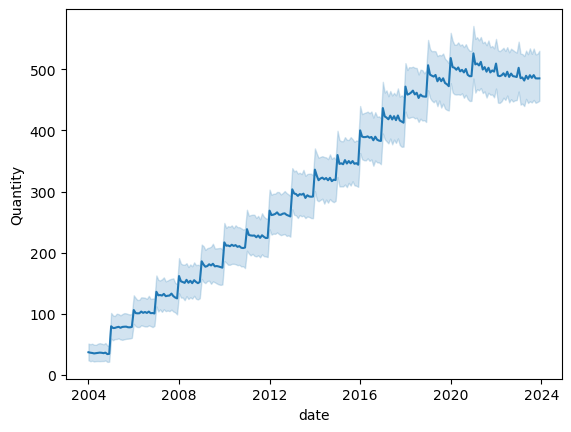

In [399]:
sns.lineplot(data=df, x='date', y='Quantity')

Maybe isotonic regression is good?

In [400]:
#sns.lineplot(data=df, x='date', y='Quantity', hue='Country')

![img](../images/output.png)

Maybe each country is *"as important"* in contributions?

# Data Preprocessing
1. Define manual encoders
2. Split date into month and ytear
3. Split in X, y

In [401]:
df.groupby('Country').describe()['Quantity'].sort_values('mean')

,count,mean,min,25%,50%,75%,max,std
Country,,,,,,,,
South Africa,24000.0,63.672875,0.0,0.0,0.0,0.00,2115.0,271.256894
India,24000.0,145.322167,0.0,0.0,0.0,0.00,2243.0,430.287969
Egypt,24000.0,180.979000,0.0,0.0,0.0,0.00,2150.0,437.398637
Australia,24000.0,221.142792,0.0,0.0,0.0,0.00,2135.0,500.450572
Brazil,24000.0,300.795875,0.0,0.0,0.0,0.00,2301.0,578.444887
Japan,24000.0,336.545083,0.0,0.0,0.0,570.00,2317.0,584.903052
Russia,24000.0,386.807458,0.0,0.0,0.0,776.25,2242.0,646.757206
France,24000.0,421.289875,0.0,0.0,0.0,822.00,2205.0,645.960522
Italy,24000.0,459.524083,0.0,0.0,0.0,915.00,2252.0,642.018752


In [402]:
df.groupby('Product').describe()['Quantity'].sort_values('mean').index.tolist()

['PurePore Sanitary Belt',
 'DailyDazzle Toothpaste',
 'SoftStep Shaving Cream for Women',
 'SmilesSoPure Waterpik',
 'GentleGlow Pet Grooming Kit',
 'SmoothOperator Shaving Gel',
 'MorningMint',
 'SoothingSoft Fabric Softener',
 'RadiantRinse Color Protector',
 'HydraHydrate Hand Cream',
 'RadiantRose Face Mask',
 'SkinSational Moisturizer',
 'RadiantRose Hair Serum',
 'SparklingSmile Water Flosser',
 'CalmingClean Bath Time Wash',
 'FreshFusion Mouth Rinse',
 'CleanSlate Disinfectant Spray',
 'SoothingSerenity Baby Rub',
 'HydratingHoney Pet Wipes',
 'SoothingPaws Cat Lotion',
 'CleanSlate Mouthwash',
 'CleanSkin Acne Treatment',
 'SoothingSerenity Baby Oil',
 'SmellSational Baby Room Spray',
 'OralEase Plus Toothbrush',
 'EasyWash Laundry Detergent',
 'SmileSavvy Tooth Whitening Kit',
 'BrightBreeze Baby Sunscreen Stick',
 'DelicateDew Sensitive Wash',
 'LuminousLip Care',
 'EasyWash Pet Laundry Detergent',
 'BrightBreeze Period Pain Relief',
 'BrightBreeze Pet Odor Eliminator',
 'S

In [403]:
hash_countries = {'South Africa': 1,
 'India': 2,
 'Egypt': 3,
 'Australia': 4,
 'Brazil': 5,
 'Japan': 6,
 'Russia': 7,
 'France': 8,
 'Italy': 9,
 'United Kingdom': 10}

In [404]:
hash_products = {}

for i, product in enumerate(df.groupby('Product').describe()['Quantity'].sort_values('mean').index.tolist()):
    hash_products[product] = i+1

In [405]:
hash_products

{'PurePore Sanitary Belt': 1,
 'DailyDazzle Toothpaste': 2,
 'SoftStep Shaving Cream for Women': 3,
 'SmilesSoPure Waterpik': 4,
 'GentleGlow Pet Grooming Kit': 5,
 'SmoothOperator Shaving Gel': 6,
 'MorningMint': 7,
 'SoothingSoft Fabric Softener': 8,
 'RadiantRinse Color Protector': 9,
 'HydraHydrate Hand Cream': 10,
 'RadiantRose Face Mask': 11,
 'SkinSational Moisturizer': 12,
 'RadiantRose Hair Serum': 13,
 'SparklingSmile Water Flosser': 14,
 'CalmingClean Bath Time Wash': 15,
 'FreshFusion Mouth Rinse': 16,
 'CleanSlate Disinfectant Spray': 17,
 'SoothingSerenity Baby Rub': 18,
 'HydratingHoney Pet Wipes': 19,
 'SoothingPaws Cat Lotion': 20,
 'CleanSlate Mouthwash': 21,
 'CleanSkin Acne Treatment': 22,
 'SoothingSerenity Baby Oil': 23,
 'SmellSational Baby Room Spray': 24,
 'OralEase Plus Toothbrush': 25,
 'EasyWash Laundry Detergent': 26,
 'SmileSavvy Tooth Whitening Kit': 27,
 'BrightBreeze Baby Sunscreen Stick': 28,
 'DelicateDew Sensitive Wash': 29,
 'LuminousLip Care': 30,


In [406]:
df = df.drop(columns=["Month"])

In [407]:
X = df.drop(columns=["Quantity"])

In [408]:
X['Year'] = X['date'].dt.year
X['Month'] = X['date'].dt.month

In [409]:
X['Year_lagged'] = X['Year']-1

In [410]:
X['Country'] = X['Country'].map(hash_countries)

In [411]:
X['Product'] = X['Product'].map(hash_products)

In [412]:
X = X.drop(columns='date')

In [413]:
y = df['Quantity']

# Baseline Model

In [414]:
from sklearn.tree import DecisionTreeRegressor

In [415]:
DT = DecisionTreeRegressor().fit(X, y)

In [416]:
y_hat = DT.predict(X)

In [417]:
from sklearn.metrics import r2_score

In [418]:
r2_score(y, y_hat)

1.0

hmm.. overfitting

# Model Evaluation & Selection

In [419]:
df = pd.read_csv("../data/01_input_history.csv")

In [420]:
from sklearn.preprocessing import StandardScaler

In [514]:
def preprocess_dataset(df_old):
    """
    INPUT:
        - original dataset
        
    RETURNS:
        - processed dataset
    """
    df = df_old.copy()


    df['date'] = pd.to_datetime(df['Month'], format='%b%Y')
    df['Year'] = df['date'].dt.year
    df['Month'] = df['date'].dt.month

    df['Year_lagged'] = df['Year']-1

    df['Year'] =df['Year']
    df['Month'] =  df['Month']
    df['Year_lagged'] = 2025 - df['Year_lagged']

    df['Product'] = df['Product'].map(hash_products) 
    df['Country'] = df['Country'].map(hash_countries)

    df = df.drop(columns=['date'])
    
    return df


In [515]:
df_preprocessed = preprocess_dataset(df)

In [516]:
df_preprocessed

,Country,Product,Month,Quantity,Year,Year_lagged
0,6,7,1,0,2004,22
1,6,7,2,0,2004,22
2,6,7,3,0,2004,22
3,6,7,4,0,2004,22
4,6,7,5,0,2004,22
...,...,...,...,...,...,...
239995,7,19,8,0,2023,3
239996,7,19,9,0,2023,3
239997,7,19,10,0,2023,3
239998,7,19,11,0,2023,3


In [517]:
X = df_preprocessed.drop(columns='Quantity')
y = df_preprocessed['Quantity']

In [518]:
from sklearn.model_selection import TimeSeriesSplit

In [519]:
splitter = TimeSeriesSplit(5)

In [520]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.ensemble import HistGradientBoostingRegressor, StackingRegressor
from sklearn.isotonic import IsotonicRegression
from xgboost import XGBRegressor
from sklearn.dummy import DummyRegressor

from sklearn.metrics import mean_squared_error

In [521]:
from sklearn.metrics import mean_squared_error

In [522]:
for i, j in zip(y, y):
    print(i, j)
    break

0 0


In [523]:
y

0         0
1         0
2         0
3         0
4         0
         ..
239995    0
239996    0
239997    0
239998    0
239999    0
Name: Quantity, Length: 240000, dtype: int64

In [524]:
def custom_loss(y_true, y_pred):
    """
    Implements custom loss described on first page
    """
    n = y_true.shape[0]

    L = 0
    for y_i, y_i_hat in zip(y_true, y_pred):
        p = (y_i - y_i_hat)**2
        if y_i == 0:
            L += (p/(y_i+1))
        else:
            L += (p/(y_i))
    L = L/n 

    return L

In [525]:

def evaluate_model(model):
    r2_scores = []
    for train_idx, test_idx in splitter.split(X, y):
        scaler = StandardScaler()
        
        X_train = X.iloc[train_idx]
        X_test = X.iloc[test_idx]

        scaler.fit(X_train)

        X_train = scaler.fit_transform(X_train)
        X_test = scaler.fit_transform(X_test)


        y_train = y.iloc[train_idx]
        y_test = y.iloc[test_idx]
        DT = model.fit(X_train, y_train)

        y_hat_test = DT.predict(X_test)
        y_hat_train = DT.predict(X_train)
        r2_scores.append(score_i_test := custom_loss(y_test, y_hat_test))
        score_i_train = custom_loss(y_train, y_hat_train)
        print(f"TEST: {score_i_test} || TRAIN: {score_i_train}")
    print("=====")
    print(np.mean(r2_scores))


In [526]:
evaluate_model(DummyRegressor()) # get baseline

TEST: 62884.73443346759 || TRAIN: 61083.52168870469
TEST: 51788.808755140104 || TRAIN: 57240.459235550734
TEST: 73535.31292316529 || TRAIN: 66815.05043677025
TEST: 61272.108296452454 || TRAIN: 60261.8845850684
TEST: 52970.55646907834 || TRAIN: 60008.5679174217
=====
60490.304175460755


In [527]:
evaluate_model(DummyRegressor(strategy='mean'))
 

TEST: 62884.73443346759 || TRAIN: 61083.52168870469
TEST: 51788.808755140104 || TRAIN: 57240.459235550734
TEST: 73535.31292316529 || TRAIN: 66815.05043677025
TEST: 61272.108296452454 || TRAIN: 60261.8845850684
TEST: 52970.55646907834 || TRAIN: 60008.5679174217
=====
60490.304175460755


In [528]:
evaluate_model(DummyRegressor(strategy='median'))


TEST: 261.826675 || TRAIN: 284.0759
TEST: 353.489525 || TRAIN: 272.9512875
TEST: 225.180275 || TRAIN: 299.7973666666667
TEST: 275.82095 || TRAIN: 281.14309375
TEST: 424.1163 || TRAIN: 280.078665
=====
308.08674499999995


In [529]:
evaluate_model(Ridge(alpha=0.1))

TEST: 80438.2099882742 || TRAIN: 72127.07794254932
TEST: 62820.304064612756 || TRAIN: 69391.23408137792
TEST: 87913.99149846382 || TRAIN: 76783.27301324603
TEST: 71245.25461877718 || TRAIN: 73210.6737772601
TEST: 65543.25543662968 || TRAIN: 73871.39136296128
=====
73592.20312135153


In [530]:
evaluate_model(GradientBoostingRegressor())

TEST: 97845.70193880392 || TRAIN: 44281.32918923888
TEST: 83811.99388967149 || TRAIN: 55766.28788584142
TEST: 95335.98640045284 || TRAIN: 64075.58315501375
TEST: 67244.18654165782 || TRAIN: 63445.240160270885
TEST: 64413.19817582365 || TRAIN: 63225.07859971036
=====
81730.21338928195


In [531]:
df = X.copy()
df['target'] = y

df.corr()

,Country,Product,Month,Year,Year_lagged,target
Country,1.000000e+00,-3.500114e-15,6.137574e-15,-7.964122e-13,2.801374e-15,0.244263
Product,-3.500114e-15,1.000000e+00,5.074599e-17,-2.561751e-15,1.345756e-16,0.224672
Month,6.137574e-15,5.074599e-17,1.000000e+00,-9.122505e-17,-4.198717e-18,-0.005007
Year,-7.964122e-13,-2.561751e-15,-9.122505e-17,1.000000e+00,-1.000000e+00,0.264742
Year_lagged,2.801374e-15,1.345756e-16,-4.198717e-18,-1.000000e+00,1.000000e+00,-0.264742
target,2.442627e-01,2.246724e-01,-5.007090e-03,2.647421e-01,-2.647421e-01,1.000000


# Deployment

In [738]:
df_test = pd.read_csv("../data/01_output_prediction_example.csv")

In [739]:
df_test.drop(columns=['Quantity'], inplace=True)

In [740]:
df_test_preprocessed = preprocess_dataset(df_test)

In [741]:
df_test_preprocessed

,Country,Product,Month,Year,Year_lagged
0,6,7,1,2024,2
1,6,7,2,2024,2
2,6,7,3,2024,2
3,6,7,4,2024,2
4,6,7,5,2024,2
...,...,...,...,...,...
11995,7,19,8,2024,2
11996,7,19,9,2024,2
11997,7,19,10,2024,2
11998,7,19,11,2024,2


In [742]:
selected = ['Country', 'Product', 'Year']

In [743]:
X_original = X.copy()

In [744]:
X = X_original

In [745]:
X

,Country,Product,Month,Year,Year_lagged
0,6,7,1,2004,22
1,6,7,2,2004,22
2,6,7,3,2004,22
3,6,7,4,2004,22
4,6,7,5,2004,22
...,...,...,...,...,...
239995,7,19,8,2023,3
239996,7,19,9,2023,3
239997,7,19,10,2023,3
239998,7,19,11,2023,3


In [746]:
df_preprocessed

,Country,Product,Month,Quantity,Year,Year_lagged
0,6,7,1,0,2004,22
1,6,7,2,0,2004,22
2,6,7,3,0,2004,22
3,6,7,4,0,2004,22
4,6,7,5,0,2004,22
...,...,...,...,...,...,...
239995,7,19,8,0,2023,3
239996,7,19,9,0,2023,3
239997,7,19,10,0,2023,3
239998,7,19,11,0,2023,3


In [747]:
X

,Country,Product,Month,Year,Year_lagged
0,6,7,1,2004,22
1,6,7,2,2004,22
2,6,7,3,2004,22
3,6,7,4,2004,22
4,6,7,5,2004,22
...,...,...,...,...,...
239995,7,19,8,2023,3
239996,7,19,9,2023,3
239997,7,19,10,2023,3
239998,7,19,11,2023,3


In [748]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [749]:
X_scaled = scaler.transform(X)
df_test_preprocessed_scaled = scaler.transform(df_test_preprocessed)

In [750]:
DT = XGBRegressor().fit(X_scaled, y)

In [751]:
df_test['Quantity'] = DT.predict(df_test_preprocessed_scaled).astype('int')

In [752]:
# df_test['Quantity'] = DummyRegressor().fit(X, y).predict(df_test_preprocessed).astype('int')

In [753]:
df_test.to_csv('../data/01_monster2.csv', index=False)

In [754]:
# try PCA

In [755]:
df_test_preprocessed['value'] = df_test['Quantity']

In [756]:
df_test_preprocessed

,Country,Product,Month,Year,Year_lagged,value
0,6,7,1,2024,2,216
1,6,7,2,2024,2,211
2,6,7,3,2024,2,211
3,6,7,4,2024,2,211
4,6,7,5,2024,2,211
...,...,...,...,...,...,...
11995,7,19,8,2024,2,232
11996,7,19,9,2024,2,232
11997,7,19,10,2024,2,212
11998,7,19,11,2024,2,212


In [757]:
df_test_preprocessed['Day'] = 1
df_test_preprocessed['Year'] = 2024
df_test_preprocessed['date'] = pd.to_datetime(df_test_preprocessed[['Day', 'Month', 'Year']])

In [758]:
my_df = X.copy()

In [759]:
my_df['Day'] = 1

In [760]:
my_df['date'] = pd.to_datetime(my_df[['Day', 'Month', 'Year']])

In [761]:
my_df['value'] = y

In [762]:
my_df

,Country,Product,Month,Year,Year_lagged,Day,date,value
0,6,7,1,2004,22,1,2004-01-01,0
1,6,7,2,2004,22,1,2004-02-01,0
2,6,7,3,2004,22,1,2004-03-01,0
3,6,7,4,2004,22,1,2004-04-01,0
4,6,7,5,2004,22,1,2004-05-01,0
...,...,...,...,...,...,...,...,...
239995,7,19,8,2023,3,1,2023-08-01,0
239996,7,19,9,2023,3,1,2023-09-01,0
239997,7,19,10,2023,3,1,2023-10-01,0
239998,7,19,11,2023,3,1,2023-11-01,0


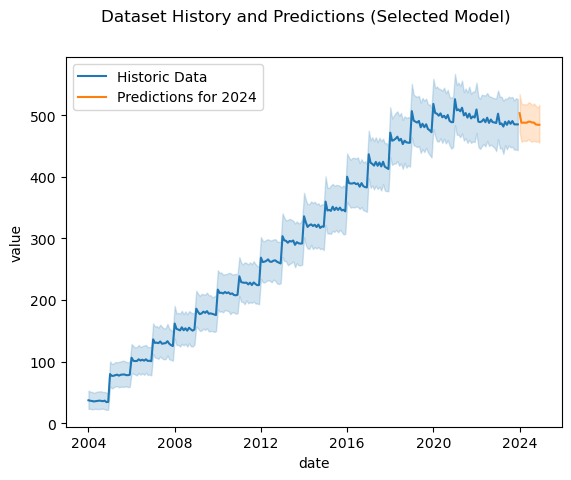

In [763]:
fig, ax = plt.subplots()

sns.lineplot(my_df, x='date', y='value', ax=ax, label="Historic Data")
sns.lineplot(df_test_preprocessed, x='date', y='value', ax=ax, label="Predictions for 2024")

fig.suptitle("Dataset History and Predictions (Selected Model)")

plt.show()

In [764]:
DT.feature_importances_

array([0.39067084, 0.31106588, 0.00838134, 0.289882  , 0.        ],
      dtype=float32)

In [765]:
X

,Country,Product,Month,Year,Year_lagged
0,6,7,1,2004,22
1,6,7,2,2004,22
2,6,7,3,2004,22
3,6,7,4,2004,22
4,6,7,5,2004,22
...,...,...,...,...,...
239995,7,19,8,2023,3
239996,7,19,9,2023,3
239997,7,19,10,2023,3
239998,7,19,11,2023,3
